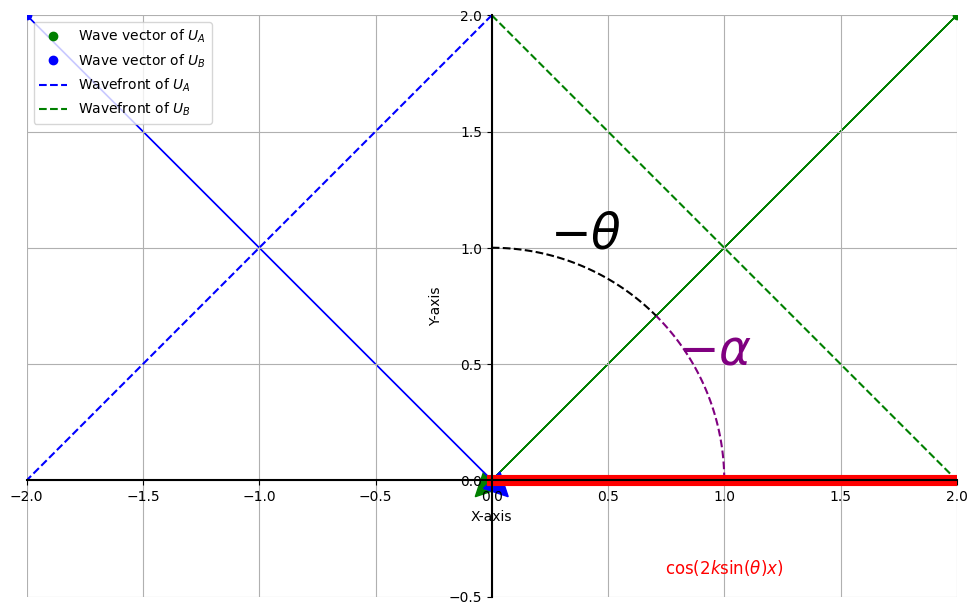

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
point1 = (2, 2)
point2 = (-2, 2)
origin = (0, 0)

# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the points
ax.plot(*point1, 'go', label="Wave vector of $U_A$")
ax.plot(*point2, 'bo', label="Wave vector of $U_B$")

# Draw arrows from points to the origin
ax.arrow(point1[0], point1[1], -point1[0], -point1[1], head_width=0.1, head_length=0.1, color='g')
ax.arrow(point2[0], point2[1], -point2[0], -point2[1], head_width=0.1, head_length=0.1, color='b')

# Calculate the angle with respect to the y-axis and plot it
angle = np.degrees(np.arctan2(1, 1))  # angle between point1 and the y-axis
ax.annotate(r'$-\theta$'.format(angle), xy=(0.25, 1), fontsize=35, color='black')

# Draw angle arcs for visual clarity
theta = np.linspace(0, np.arctan2(-0.5, 0.5), 100)
ax.plot(np.sin(-theta), np.cos(theta), color="black", linestyle="--")


# Define the angle between (0.5, 0.5) and the x-axis
angle2 = np.degrees(np.arctan2(1, 1))
ax.annotate(r'$-\alpha$'.format(angle2), xy=(0.8, 0.5), fontsize=35, color='purple')

# Draw angle arc for visual clarity
phi = np.linspace(0, np.arctan2(1, 1), 100)
ax.plot(np.cos(phi),np.sin(phi), color="purple", linestyle="--")


# New lines from (0, 1) to (-1, 0) and (1, 0)
ax.plot([0, -2], [2, 0], color="blue", linestyle="--", label="Wavefront of $U_A$")
ax.plot([0, 2], [2, 0], color="green", linestyle="--", label="Wavefront of $U_B$")

# Draw the red line from (0, 0) to (2, 0) with a thicker width
ax.plot([0, 2], [0, 0], color="red", linewidth=8)

# Add the label below the line
ax.text(1, -0.4, r'$\cos(2k \sin(\theta) x)$', color="red", ha='center', fontsize=12)


# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 2)
ax.set_aspect('equal')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Move x-axis and y-axis to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Set color for x-axis
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Hide top and right spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Display legend and grid
ax.legend(loc="upper left")
ax.grid(True)
plt.show()


[]

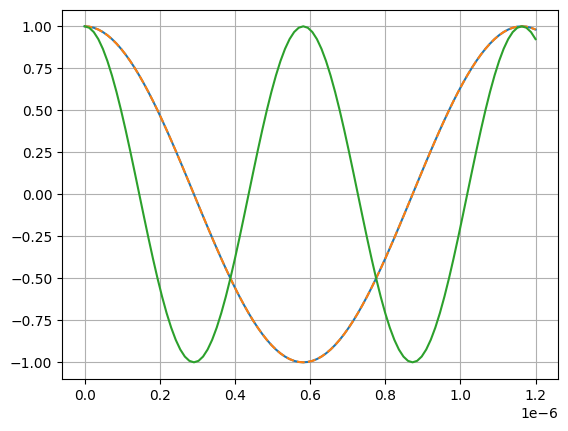

In [2]:
import numpy as np

wavelength = 633e-9  # Wavelength in meters
U_0 = 1  # Amplitude

theta = 10

def wave_A(U_0, wavelength, x):
    return np.real(U_0 * np.exp(1j * (-2 * np.pi / wavelength) * x*np.sin(theta)))

def wave_B(U_0, wavelength, x):
    return np.real(U_0 * np.exp(1j * (2 * np.pi / wavelength) * x*np.sin(-theta)))

def wave_interferenced(U_0, wavelength, x):
    return np.real(U_0 * np.exp(-2*1j * (2 * np.pi / wavelength) * x*np.sin(theta)))
# Example usage:

x_values = np.linspace(0, 1.2e-6, 100)  # Generate an array of x values from 0 to 1 micrometer

plt.grid()
plt.plot(x_values,wave_A(U_0, wavelength, x_values))
plt.plot(x_values,wave_B(U_0, wavelength, x_values),ls="--")
plt.plot(x_values,wave_interferenced(U_0, wavelength, x_values))
plt.plot()

Order -2: Angle pos=-0.6061, pos on screen=-0.6932
Order -2: Angle neg=-0.1911, pos on screen=-0.1934
Order -1: Angle pos=-0.3896, pos on screen=-0.4106
Order -1: Angle neg=0.0000, pos on screen=0.0000
Order 0: Angle pos=-0.1911, pos on screen=-0.1934
Order 0: Angle neg=0.1911, pos on screen=0.1934
Order 1: Angle pos=0.0000, pos on screen=0.0000
Order 1: Angle neg=0.3896, pos on screen=0.4106
Order 2: Angle pos=0.1911, pos on screen=0.1934
Order 2: Angle neg=0.6061, pos on screen=0.6932


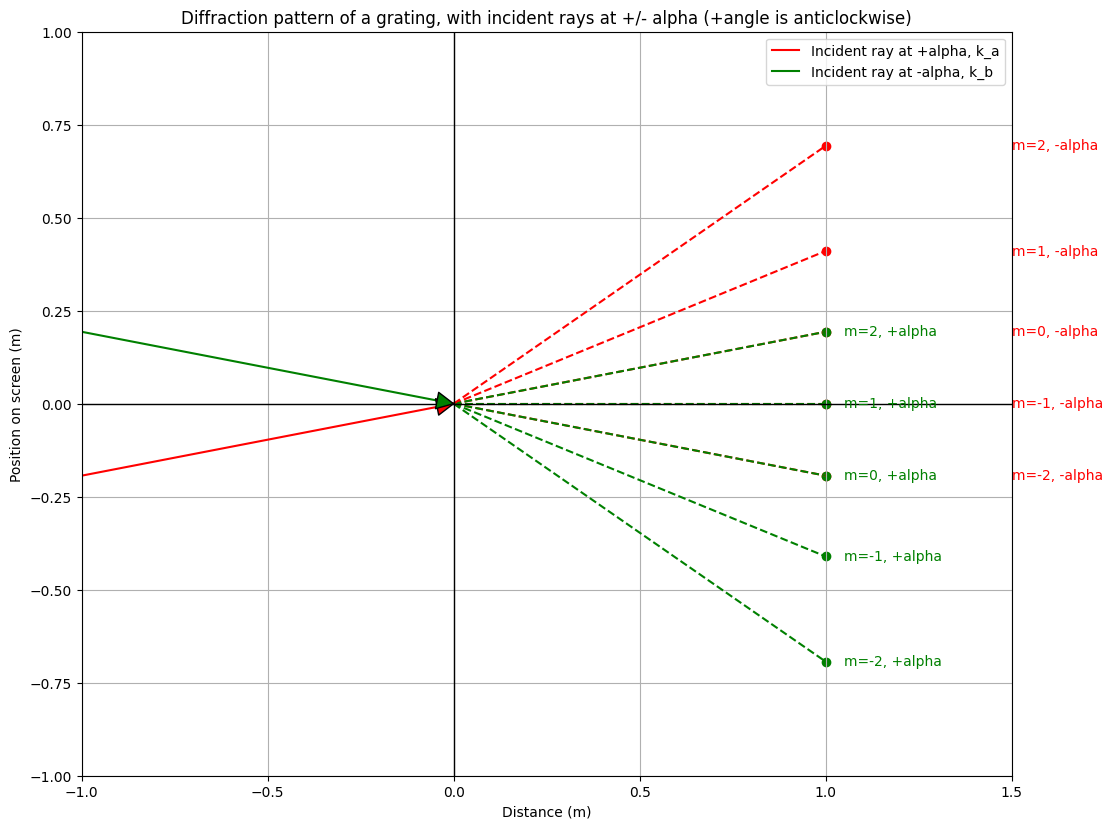

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 633e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 1.0  # Distance to screen in meters

# Create a figure and axis for plotting with figsize (12, 10)
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the incident rays from the left at angles +alpha and -alpha
x_left = np.linspace(0, L, 100)-1 # From -L to 0
y_left_pos =  np.tan(alpha) * x_left  # Line equation for the ray at +alpha red

# Plot the two incoming rays
ax.plot(x_left, y_left_pos, color='red', label='Incident ray at +alpha, k_a')
ax.plot(x_left, -y_left_pos, color='green', label='Incident ray at -alpha, k_b')

# Add arrow tips
ax.annotate('', xy=(x_left[-1], y_left_pos[-1]), xytext=(x_left[-2], y_left_pos[-2]),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('', xy=(x_left[-1], -y_left_pos[-1]), xytext=(x_left[-2], -y_left_pos[-2]),
            arrowprops=dict(facecolor='green', shrink=0.05))


# Calculate and plot diffraction orders
for m in range(-2, 3):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        angle_neg = np.arcsin(m * wl / d + np.sin(alpha))
 
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive alpha (use red for all these rays)
        ax.plot([0, L], [0, pos_pos], 'g--')
        
        # Plot the diffracted rays for negative alpha (use green for all these rays)
        ax.plot([0, L], [0, pos_neg], 'r--')

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_neg, color='red')
        ax.scatter(L, pos_pos, color='green')

        # Add labels for each line next to the corresponding maxima point
        ax.text(L + 0.05, pos_pos, f"m={m}, +alpha", color='green', verticalalignment='center')
        ax.text(L + 0.5, pos_neg, f"m={m}, -alpha", color='red', verticalalignment='center')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black',linewidth=1)  # x-axis
ax.axvline(0, color='black',linewidth=1)  # y-axis
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.grid(True)
ax.title.set_text('Diffraction pattern of a grating, with incident rays at +/- alpha (+angle is anticlockwise)')
ax.set_aspect('equal', 'box')
ax.legend(loc='upper right')


# Show the plot
plt.show()


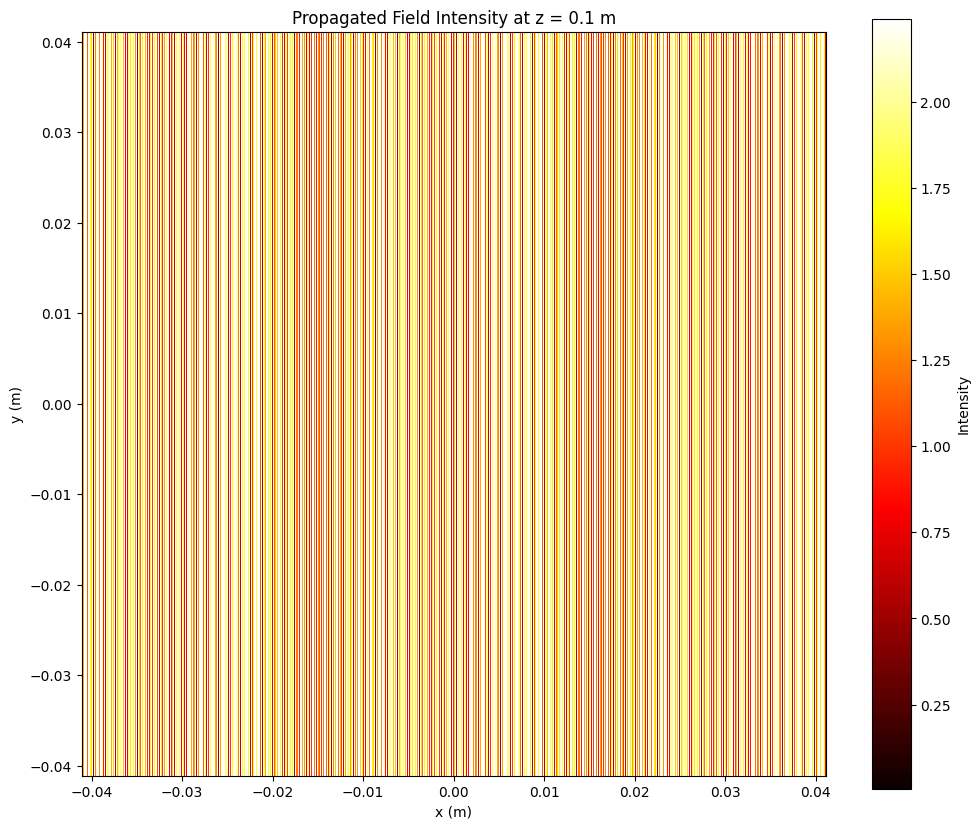

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.fft import fft2, ifft2, fftshift

# Parameters (same as your code)
wavelength = 633e-9  # Wavelength in meters (633 nm for He-Ne laser)
k = 2 * np.pi / wavelength  # Wavenumber
z = 0.1  # Propagation distance in meters
num_points = 1000  # Resolution of the grid
Lambda = 3.3e-6  # Grating period in meters (1 micron)
size = 0.0411  # Size of the grid in meters (till 4.11 cm where Order -1 is visible )
m = 2.48  # Phase modulation depth
theta =   # Angle of the incoming plane wave in radians (0.19106029214617076)

# Spatial grid
x = np.linspace(-size , size , num_points)
y = np.linspace(-size , size , num_points)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]  # Sampling interval
a = 0.11054102515523792

# Define the sinusoidal grating function
G = np.exp(1j * (m / 2) * np.sin(2 * np.pi * (X+a) / Lambda))

# Define the initial wavefront U'(x, y, 0)
U_0 = 1
plane_wave_1 = np.exp(1j * k * np.sin(theta) * (X))
plane_wave_2 = np.exp(-1j * k * np.sin(theta) * (X))
U = G * U_0 * (plane_wave_1+plane_wave_2)

# Fourier transform of the initial field
U_f = fftshift(fft2(U))

# Frequency grid
fx = np.fft.fftfreq(num_points, d=dx)
fy = np.fft.fftfreq(num_points, d=dx)
FX, FY = np.meshgrid(fx, fy)

# Transfer function for free-space propagation
H = np.exp(1j * k * z * np.sqrt(1 - (wavelength * FX)**2 - (wavelength * FY)**2))

# Apply the transfer function in the frequency domain
U_z_f = U_f * H

# Inverse Fourier transform to get the propagated field
U_z = ifft2(fftshift(U_z_f))

# Get min and max of U_z for custom colormap normalization
min_val = np.min(np.abs(U_z))  # Minimum absolute value of U_z
max_val = np.max(np.abs(U_z))  # Maximum absolute value of U_z

# Create custom normalization for colormap based on the data range
norm = Normalize(vmin=min_val, vmax=max_val)

# Choose a colormap (you can change this to any colormap you prefer)
cmap = plt.get_cmap("hot")  # Or any other colormap, like "hot", "cool", etc.


# Plot the intensity of the propagated field with the custom colormap
plt.figure(figsize=(12, 10))
plt.imshow(np.abs(U_z)**2, extent=(-size, size, -size, size), cmap=cmap, norm=norm)
plt.colorbar(label="Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title(f"Propagated Field Intensity at z = {z} m")
plt.show()


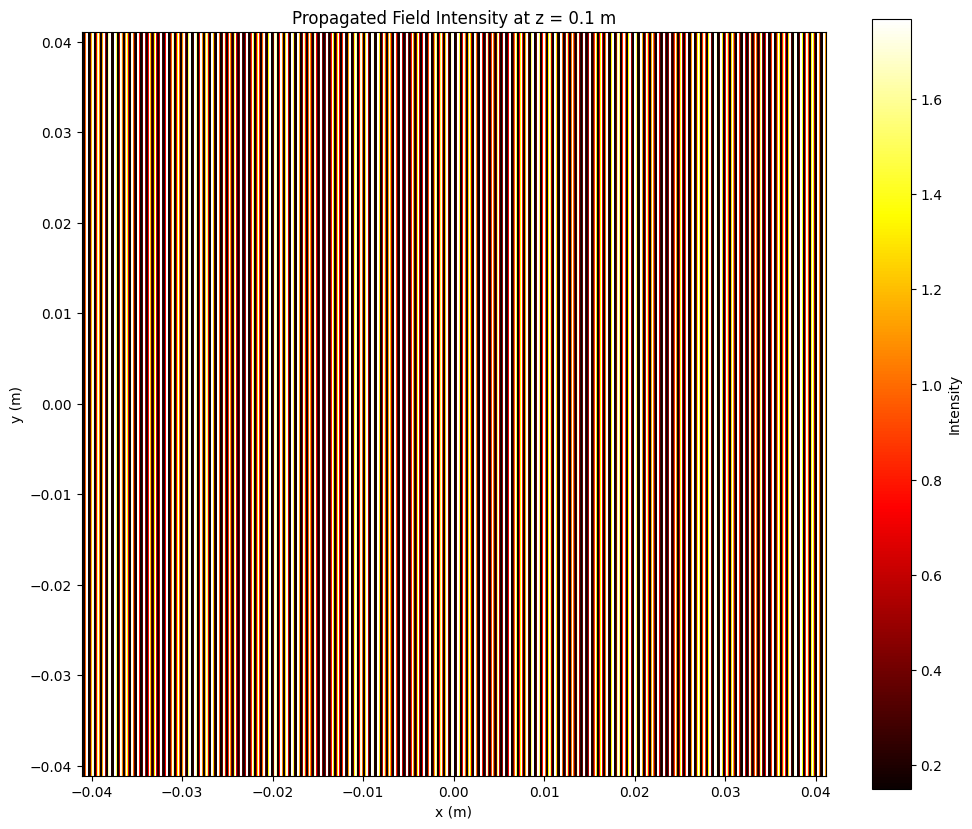

In [6]:
# Parameters (same as your code)
wavelength = 633e-9  # Wavelength in meters (633 nm for He-Ne laser)
k = 2 * np.pi / wavelength  # Wavenumber
z = 0.1  # Propagation distance in meters
num_points = 512  # Resolution of the grid
Lambda = 3.3e-6  # Grating period in meters (1 micron)
size = 0.0411  # Size of the grid in meters (till 4.11 cm where Order -1 is visible )
m = 2.48  # Phase modulation depth
theta = 0  # Angle of the incoming plane wave in radians


# Spatial grid
x = np.linspace(-size , size , num_points)
y = np.linspace(-size , size , num_points)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]  # Sampling interval

# Define the sinusoidal grating function (one-dimensional)
G = np.exp(1j * (m / 2) * np.sin(2 * np.pi * X / Lambda))

# Define the initial wavefront U'(x, y, 0) (plane wave traveling along the z-axis)
# The wave travels along z but has an angle theta towards the x-axis
U_0 = 1
k_x = k * np.sin(theta)  # Wave vector component along x-axis
plane_wave_1 = np.exp(1j * k_x * X)  # Corrected plane wave

# Combine the wave with the grating
U = G * U_0 * plane_wave_1

# Fourier transform of the initial field
U_f = fftshift(fft2(U))

# Frequency grid
fx = np.fft.fftfreq(num_points, d=dx)
fy = np.fft.fftfreq(num_points, d=dx)
FX, FY = np.meshgrid(fx, fy)

# Transfer function for free-space propagation
H = np.exp(1j * k * z * np.sqrt(1 - (wavelength * FX)**2 - (wavelength * FY)**2))

# Apply the transfer function in the frequency domain
U_z_f = U_f * H

# Inverse Fourier transform to get the propagated field
U_z = ifft2(fftshift(U_z_f))

# Get min and max of U_z for custom colormap normalization
min_val = np.min(np.abs(U_z))  # Minimum absolute value of U_z
max_val = np.max(np.abs(U_z))  # Maximum absolute value of U_z

# Create custom normalization for colormap based on the data range
norm = Normalize(vmin=min_val, vmax=max_val)

# Choose a colormap (you can change this to any colormap you prefer)
cmap = plt.get_cmap("hot")  # Or any other colormap, like "hot", "cool", etc.

# Plot the intensity of the propagated field with the custom colormap
plt.figure(figsize=(12, 10))
plt.imshow(np.abs(U_z)**2, extent=(-size, size, -size, size), cmap=cmap, norm=norm)
plt.colorbar(label="Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title(f"Propagated Field Intensity at z = {z} m")
plt.show()


In [ ]:
theta = np.arcsin(633e-9/3.3e-6)
k = 2*np.pi/633e-9
U_A = lambda U_0,x,z : U_0*np.exp(1j*k*(np.sin(theta)*x+np.sin(theta)*z))
U_B = lambda U_0,x,z : U_0*np.exp(1j*k*(-np.sin(theta)*x+np.sin(theta)*z))

Intensity =  np.abs(U_A(1,0,0)+U_B(1,0,0))**2
print(Intensity)

z=-1
Intensity =  np.abs(U_A(1,0,z)+U_B(1,0,z))**2
print(Intensity)

4.0
4.0


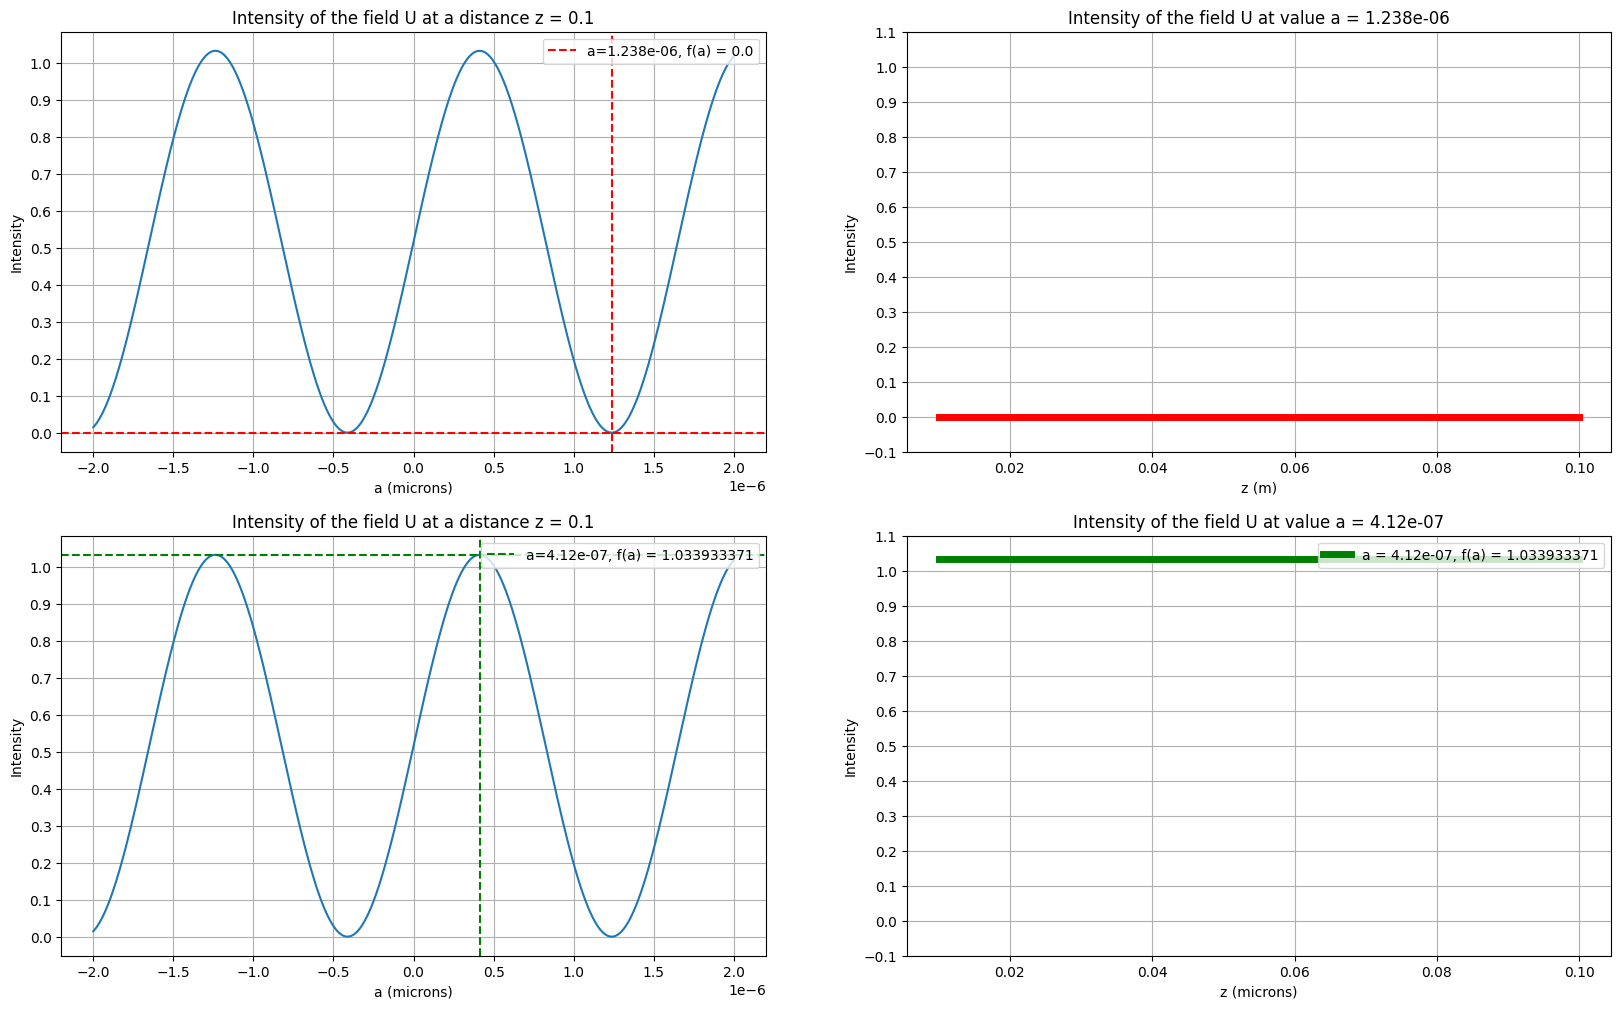

In [55]:
from scipy.special import jn  # for J_n(x)

def U(z,U_0,wavelength,periode_gratting,q_a,theta,q_b,a):

    """
    Calculate the field U at a distance z.
    ---------------------------------------
    Parameters:
    z (float): Distance at which the field is calculated.
    U_0 (complex): Initial field amplitude.
    wavelength (float): Wavelength of the light.
    periode_gratting (float): Period of the grating.
    q_a (int): Diffraction order for the lower beam.
    theta (float): Angle of incidence.
    q_b (int): Diffraction order for the upper beam.
    a (float): Parameter related to the grating.
    
    Returns:
    complex: The calculated field U at distance z.
    """

    k = 2*np.pi/wavelength
    h_0 = -1j*np.exp(1j*k*z)/(wavelength*z)
    alpha = k/(2*z)
    n = 1.5  
    s = 0.5e-6
    m = 2 * np.pi *(n-1)*s/wavelength
    
    a_q = 2 * np.pi * q_a / periode_gratting + k * np.sin(theta)
    b_q = 2 * np.pi * q_b / periode_gratting - k * np.sin(theta)

    aq=(a_q**2)/(8*alpha)
    bq=(b_q**2)/(8*alpha)

    k_a = ((a_q/4)*jn(q_a,m/2)*np.exp(-1j*((aq)-q_a*np.pi/4))*(jn(1/2,aq)+1j*jn(-1/2,aq)))*np.exp( 1j*k*np.sin(theta)*a)
    k_b = ((b_q/4)*jn(q_b,m/2)*np.exp(-1j*((bq)-q_b*np.pi/4))*(jn(1/2,bq)+1j*jn(-1/2,bq)))*np.exp(-1j*k*np.sin(theta)*a)

    return U_0*h_0*np.sqrt((np.pi/alpha)**3)*(k_a+k_b)


z = 0.1 # Distance at which the field is calculated (0.1 m)
U_0 = 1  # Initial field amplitude (1)
wavelength = 633e-9 # Wavelength of the light (633 nm = 633e-9 m)
periode_gratting = 3.3e-6  # Grating period in meters (3.3 micron=3.3e-6 m)
q_a= -1 # Diffraction order for the lower beam (-1)
theta = np.arcsin(wavelength/periode_gratting)
 # Angle of incidence (0.19106029214617076 rad)
q_b= 1 # Diffraction order for the upper beam (1)


a_fkt_min = lambda n: periode_gratting/2 * (3/4 + n)
a_pick_min = a_fkt_min(0)
a_pick_max = a_pick_min - ( a_fkt_min(1)- a_fkt_min(0))/2

z_pick = 0.1 # Distance at which the field is calculated (0.1 m)

f = lambda z,a: np.abs(U(z,U_0,wavelength,periode_gratting,q_a,theta,q_b,a))**2
a = np.linspace(-2, 2, 1000)*1e-6


fig, axs = plt.subplots(2, 2, figsize=(20, 12))
ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]

# First plot
ax1.set_title("Intensity of the field U at a distance z = {}".format(z_pick))
ax1.set_xlabel("a (microns)")
ax1.set_ylabel("Intensity")
ax1.plot(a, f(z_pick,a))
ax1.axhline(y=0, color='r', linestyle='--')
ax1.axvline(x=a_pick_min, color='r', linestyle='--', label="a={}, f(a) = {}".format(round(a_pick_min,9),round(f(z,a_pick_min),9)))
ax1.set_yticks(np.arange(0, 1.1, 0.1))  # Generate ticks between -0.1 and 1 with step 0.1
ax1.grid()
ax1.legend(loc="upper right")

# Second plot
z_vals = np.linspace(0.01,z_pick,1000)
ax2.plot(z_vals, f(z_vals, a_pick_min), color='r', label="a = {}".format(round(a_pick_min)),linewidth=5)
ax2.set_title("Intensity of the field U at value a = {}".format(round(a_pick_min,9)))
ax2.set_xlabel("z (m)")
ax2.set_ylabel("Intensity")
ax2.set_yticks(np.arange(-0.1, 1.1, 0.1))  # Generate ticks between -0.1 and 1 with step 0.1
ax2.grid()

# Third plot
ax3.set_title("Intensity of the field U at a distance z = {}".format(z_pick))
ax3.set_xlabel("a (microns)")
ax3.set_ylabel("Intensity")
ax3.plot(a, f(z_pick,a))
ax3.axhline(y=max(f(z_pick,a)), color='g', linestyle='--')
ax3.axvline(x=a_pick_max, color='g', linestyle='--', label="a={}, f(a) = {}".format(round(a_pick_max,9),round(f(z,a_pick_max),9)))
ax3.legend(loc="upper right")
ax3.set_yticks(np.arange(0, 1.1, 0.1))  # Generate ticks between -0.1 and 1 with step 0.1
ax3.grid()

# Fourth plot
z_vals = np.linspace(0.01,z_pick,1000)
y_vals = f(z_vals,a_pick_max)

ax4.plot(z_vals, y_vals, color='g', label="a = {}, f(a) = {}".format(round(a_pick_max,9),round(max(f(z_vals,a_pick_max)),9)),linewidth=5)
ax4.set_title("Intensity of the field U at value a = {}".format(round(a_pick_max,9)))
ax4.set_xlabel("z (microns)")
ax4.set_ylabel("Intensity")
ax4.ticklabel_format(useOffset=False)
ax4.set_yticks(np.arange(-0.1, 1.1, 0.1))  # Generate ticks between -0.1 and 1 with step 0.1
ax4.legend(loc="upper right")
ax4.grid()

plt.show()


In [79]:
from ipywidgets import interact, FloatSlider

f = lambda z, a: np.abs(U(z, U_0, wavelength, periode_gratting, q_a, theta, q_b, a)) ** 2

# Interactive function
def update_plot(a_val):
    a_range = np.linspace(-0.2, 0.2, 1000)
    z_vals = np.linspace(0.01, z_pick, 1000)

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Left Plot: Intensity at z_pick as a function of `a`
    axs[0].plot(a_range, f(z_pick, a_range))
    axs[0].axhline(y=0, color="r", linestyle="--")
    axs[0].axvline(x=a_val, color="g", linestyle="--")
    axs[0].set_title(f"Intensity of the field U at z = {z_pick}")
    axs[0].set_xlabel("a")
    axs[0].set_ylabel("Intensity")
    axs[0].set_yticks(np.arange(0, 1.1, 0.1))
    axs[0].grid()

    # Right Plot: Intensity as a function of `z` at given `a`
    y_vals = f(z_vals, a_val)
    axs[1].plot(z_vals, y_vals, color="g", linewidth=2)
    axs[1].set_title(f"Intensity vs z for a = {round(a_val, 3)}")
    axs[1].set_xlabel("z (m)")
    axs[1].set_ylabel("Intensity")
    axs[1].set_yticks(np.arange(-0.1, 1.1, 0.1))  # Generate ticks between -0.1 and 1 with step 0.1
    axs[1].grid()

    plt.show()

# Slider for `a` with a custom description
slider = FloatSlider(
    min=a_pick_min, 
    max=a_pick_max, 
    step=0.0001, 
    value=0.0, 
    description="Parameter a:",
    layout={'width': '500px', 'height': '30px'}  # Adjust width and height here
)

interact(update_plot, a_val=slider)


TraitError: Setting min > max

In [ ]:
a_min = lambda n: Lambda/2 * (3/4 + n)
print(a_min(0))
print(a_fkt_min(0))

1.2375e-06
1.2375000000000002e-06


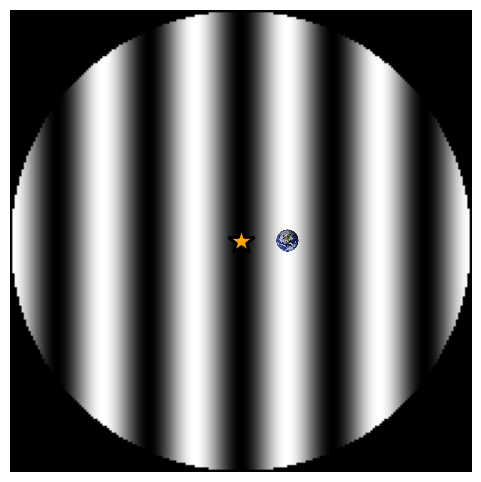

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

# Parameter für das Interferenzmuster
lambda_ = 500e-9   # Wellenlänge des Lichts (500 nm)
b = 3e-3           # Abstand zwischen den Teleskopen (1 mm)
k = 2 * np.pi / lambda_  # Wellenzahl
size = 200       # Bildgröße in Pixeln
fringe_scale = 10  # Skalierung der Fransenbreite

# Erstellen eines 2D-Gitters
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X, Y = np.meshgrid(x, y)

# Berechnen der radialen Position (Abstand vom Mittelpunkt)
R = np.sqrt(X**2 + Y**2)

# Intensitätsmuster für das Interferenzbild
I_star = 0.5 * (1 + np.cos(k * fringe_scale * X))  # Fransenmuster in x-Richtung

# Maske für runden Rand (um das Bild kreisförmig zu machen)
circular_mask = R <= 1

# Anwenden der Maske
I_total = I_star * circular_mask

# Plotten des Interferenzmusters
plt.figure(figsize=(6, 6))
plt.imshow(I_total, cmap='gray', extent=(-1, 1, -1, 1))

# Stern-Markierung hinzufügen
plt.plot(0, 0, marker='*', color='orange', markersize=20, markeredgewidth=2, markeredgecolor='black')

# Bild der Erde laden und als Planeten markieren
# (hier muss der Pfad zu deinem Bild der Erde eingefügt werden)
earth_img_path = "Earth.png"  # Ersetze mit deinem Bildpfad
earth_image = plt.imread(earth_img_path)

# Position für das Bild der Erde festlegen
planet_pos_x = 0.2  # Berechnete Position für den Planeten
planet_pos_y = 0.0

# Bild skalieren und an Position einfügen
imagebox = OffsetImage(earth_image, zoom=0.015)  # Passe 'zoom' für die Bildgröße an
ab = AnnotationBbox(imagebox, (planet_pos_x, planet_pos_y), frameon=False)
plt.gca().add_artist(ab)

# Entfernen der Achsen und Anzeigen des Bildes
plt.axis('off')
plt.show()


In [50]:
from scipy.special import jn  # for J_n(x)


z = 0.1 # Distance at which the field is calculated (0.1 m)
a = 0
U_0 = 1  # Initial field amplitude (1)
wavelength = 633e-9 # Wavelength of the light (633 nm = 633e-9 m)
periode_gratting = 3.3e-6  # Grating period in meters (3.3 micron=3.3e-6 m)
q_a= -1 # Diffraction order for the lower beam (-1)
theta = np.arcsin(wavelength/periode_gratting)

 # Angle of incidence (0.19106029214617076 rad)
k = 2*np.pi/wavelength
h_0 = -1j*np.exp(1j*k*z)/(wavelength*z)
alpha = k/(2*z)
n = 1.5  
s = 0.5e-6
m = 2 * np.pi *(n-1)*s/wavelength
        
a_q = 2 * np.pi * q_a / periode_gratting + k * np.sin(theta)

aq=(a_q**2)/(8*alpha)

k_a = ((a_q/4)*jn(q_a,m/2)*np.exp(-1j*((aq)-q_a*np.pi/4))*(jn(1/2,aq)+1j*jn(-1/2,aq)))*np.exp( 1j*k*np.sin(theta)*a)

print(np.abs(U_0*h_0*np.sqrt((np.pi/alpha)**3)*(k_a))**2)

0.25848334266265943


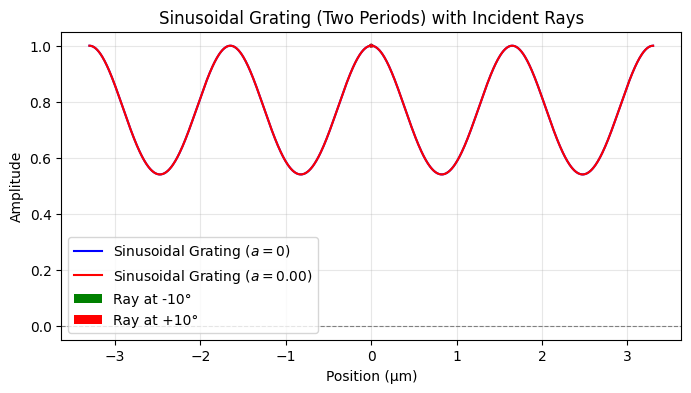

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1.5  # refractive index
s = 3.3e-6  # grating spacing (in meters)
wavelength = 633e-9  # wavelength (in meters)
x = np.linspace(-1 * s, 1 * s, 1000)  # spatial domain (two periods of the grating)

# Sinusoidal grating function (using m as the phase modulation amplitude)
m = 2 * np.pi * (n - 1) * s / wavelength
grating = np.exp(1j * np.sin(2 * np.pi * x / s))

grating_a = np.exp(1j * np.sin(2 * np.pi * (x + 0) / s))  # Assuming a_fkt_min(0) == 0

# Plotting the sinusoidal grating
plt.figure(figsize=(8, 4))
plt.plot(x * 1e6, np.real(grating), label=f"Sinusoidal Grating ($a={0}$)", color='blue')
plt.plot(x * 1e6, np.real(grating_a), label=f"Sinusoidal Grating ($a={0:.2f}$)", color='red')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Add two arrows representing rays at -10° and +10° angles to the y-axis
# Angle to radians
theta1 = np.deg2rad(-10)  # -10 degrees
theta2 = np.deg2rad(10)   # +10 degrees

# Calculate arrow end points for each angle
x_arrow1 = np.linspace(0, np.tan(theta1) * s, 10)
y_arrow1 = np.linspace(0, s, 10)

x_arrow2 = np.linspace(0, np.tan(theta2) * s, 10)
y_arrow2 = np.linspace(0, s, 10)

# Plot arrows for the incident rays
plt.quiver([0], [1], [np.tan(theta1) * s], [s], angles='xy', scale_units='xy', scale=1, color='green', label="Ray at -10°")
plt.quiver([0], [1], [np.tan(theta2) * s], [s], angles='xy', scale_units='xy', scale=1, color='red', label="Ray at +10°")

# Labels and grid
plt.xlabel("Position (µm)")
plt.ylabel("Amplitude")
plt.title("Sinusoidal Grating (Two Periods) with Incident Rays")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()
